# EDA

https://www.kaggle.com/ranjeetjain3/deep-learning-using-sign-langugage

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset

In [4]:
dataset_path = '/Users/squinn95/Desktop/Hack/sign-language-mnist'

In [5]:
train_data = pd.read_csv(os.path.join(dataset_path, 'sign_mnist_train.csv'))

In [6]:
test_data = pd.read_csv(os.path.join(dataset_path, 'sign_mnist_test.csv'))

In [7]:
print('Dataframe Shape:', train_data.shape)

Dataframe Shape: (27455, 785)


In [8]:
X_train = train_data.iloc[:, 1:].values

In [9]:
X_train.shape

(27455, 784)

In [10]:
X_test = test_data.iloc[:, 1:].values

In [11]:
X_test.shape

(7172, 784)

In [12]:
y_train = train_data.iloc[:, :1].values.flatten()

In [13]:
y_train

array([ 3,  6,  2, ..., 18, 17, 23])

In [14]:
y_test = test_data.iloc[:, :1].values.flatten()

In [15]:
y_test

array([ 6,  5, 10, ...,  2,  4,  2])

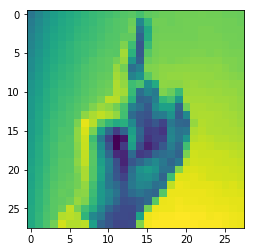

In [16]:
plt.imshow(X_train[0].reshape(28, 28))
plt.show()

In [17]:
def display(index, x, y):
    plt.imshow(x[index].reshape(28, 28), cmap = 'gray')
    plt.title(str(y[index]))
    plt.show()

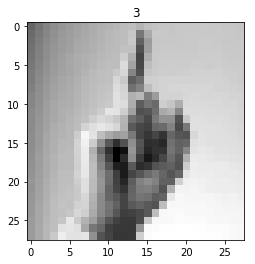

In [18]:
display(0, X_train, y_train)

In [19]:
X_train[0][:10]

array([107, 118, 127, 134, 139, 143, 146, 150, 153, 156])

In [20]:
X_train = X_train / 255.

In [21]:
X_train[0][:10]

array([0.41960784, 0.4627451 , 0.49803922, 0.5254902 , 0.54509804,
       0.56078431, 0.57254902, 0.58823529, 0.6       , 0.61176471])

In [22]:
X_test = X_test / 255.

In [23]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

In [24]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [25]:
from keras.utils import to_categorical

In [26]:
y_train_encoded = to_categorical(y_train)

In [27]:
y_train_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [28]:
y_test_encoded = to_categorical(y_test)

In [29]:
# inverting to find out the number
np.argmax(y_train_encoded[0])

3

In [30]:
X_train.shape, X_test.shape

((27455, 28, 28, 1), (7172, 28, 28, 1))

In [31]:
y_train_encoded.shape, y_test_encoded.shape

((27455, 25), (7172, 25))

## Train

In [32]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [42]:
# Hyperparameters
batch_size = 128
num_classes = 25
epochs = 15

In [40]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu', input_shape=(28, 28, 1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

'''
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))
'''

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.40))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
__________

In [43]:
model.compile(loss = keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [44]:
history = model.fit(X_train, 
                    y_train_encoded, 
                    validation_data = (X_test, y_test_encoded), 
                    epochs=epochs, 
                    batch_size=batch_size)

Train on 27455 samples, validate on 7172 samples
Epoch 1/15
27455/27455 [==============================] - 31s 1ms/step - loss: 2.8010 - acc: 0.1293 - val_loss: 1.8163 - val_acc: 0.3786
Epoch 2/15
27455/27455 [==============================] - 31s 1ms/step - loss: 1.2682 - acc: 0.5495 - val_loss: 0.8212 - val_acc: 0.7182
Epoch 3/15
27455/27455 [==============================] - 32s 1ms/step - loss: 0.6070 - acc: 0.7774 - val_loss: 0.5329 - val_acc: 0.7978
Epoch 4/15
27455/27455 [==============================] - 40s 1ms/step - loss: 0.3191 - acc: 0.8876 - val_loss: 0.4021 - val_acc: 0.8593
Epoch 5/15
27455/27455 [==============================] - 34s 1ms/step - loss: 0.1822 - acc: 0.9408 - val_loss: 0.3545 - val_acc: 0.8862
Epoch 6/15
27455/27455 [==============================] - 34s 1ms/step - loss: 0.0985 - acc: 0.9683 - val_loss: 0.3968 - val_acc: 0.8794
Epoch 7/15
27455/27455 [==============================] - 33s 1ms/step - loss: 0.0723 - acc: 0.9776 - val_loss: 0.3427 - val_acc:

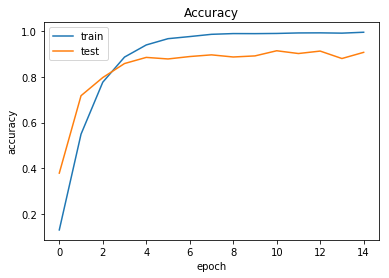

In [45]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [46]:
'Validation accuracy:', history.history['val_acc'][-1]

('Validation accuracy:', 0.908393753485778)